In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.style.use("ggplot")
import matplotlib.dates as mdates

In [2]:
columns = ['用户ID','购买日期','购买产品数量','购买金额']
df = pd.read_table("CDNOW_master.txt",names = columns,sep="\s+")


df

,用户ID,购买日期,购买产品数量,购买金额
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76
...,...,...,...,...
69654,23568,19970405,4,83.74
69655,23568,19970422,1,14.99
69656,23569,19970325,2,25.74
69657,23570,19970325,3,51.12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   用户ID    69659 non-null  int64  
 1   购买日期    69659 non-null  int64  
 2   购买产品数量  69659 non-null  int64  
 3   购买金额    69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [4]:
df.describe()

,用户ID,购买日期,购买产品数量,购买金额
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


笔记

In [5]:
df["购买日期"] = pd.to_datetime(df["购买日期"],format="%Y%m%d")



df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   用户ID    69659 non-null  int64         
 1   购买日期    69659 non-null  datetime64[ns]
 2   购买产品数量  69659 non-null  int64         
 3   购买金额    69659 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.1 MB


In [6]:
df['购买月份'] = df['购买日期'].dt.to_period("M")

df

,用户ID,购买日期,购买产品数量,购买金额,购买月份
0,1,1997-01-01,1,11.77,1997-01
1,2,1997-01-12,1,12.00,1997-01
2,2,1997-01-12,5,77.00,1997-01
3,3,1997-01-02,2,20.76,1997-01
4,3,1997-03-30,2,20.76,1997-03
...,...,...,...,...,...
69654,23568,1997-04-05,4,83.74,1997-04
69655,23568,1997-04-22,1,14.99,1997-04
69656,23569,1997-03-25,2,25.74,1997-03
69657,23570,1997-03-25,3,51.12,1997-03


 累加器举例：  
a = [1,2,3,4,5,6,7]  
 print(np.cumsum(a))  
cumsum把前面累加,用与算用户贡献度,50%用户占总销售多少  
.tail()最后5行展示

用户贡献度,个别用户占销售量多少

In [8]:
用户与累加 = df.groupby("用户ID")["购买金额"].sum().sort_values().reset_index()
用户与累加

,用户ID,购买金额
0,10175,0.00
1,4559,0.00
2,1948,0.00
3,925,0.00
4,10798,0.00
...,...,...
23565,7931,6497.18
23566,19339,6552.70
23567,7983,6973.07
23568,14048,8976.33


In [9]:
用户与累加["累加金额"] = 用户与累加["购买金额"].cumsum()
用户与累加


,用户ID,购买金额,累加金额
0,10175,0.00,0.00
1,4559,0.00,0.00
2,1948,0.00,0.00
3,925,0.00,0.00
4,10798,0.00,0.00
...,...,...,...
23565,7931,6497.18,2463822.60
23566,19339,6552.70,2470375.30
23567,7983,6973.07,2477348.37
23568,14048,8976.33,2486324.70


In [10]:
用户与累加["用户贡献值"] = 用户与累加.apply(lambda x:x["累加金额"]/用户与累加["累加金额"].max(),axis=1)

用户与累加

,用户ID,购买金额,累加金额,用户贡献值
0,10175,0.00,0.00,0.000000
1,4559,0.00,0.00,0.000000
2,1948,0.00,0.00,0.000000
3,925,0.00,0.00,0.000000
4,10798,0.00,0.00,0.000000
...,...,...,...,...
23565,7931,6497.18,2463822.60,0.985405
23566,19339,6552.70,2470375.30,0.988025
23567,7983,6973.07,2477348.37,0.990814
23568,14048,8976.33,2486324.70,0.994404


<Axes: >

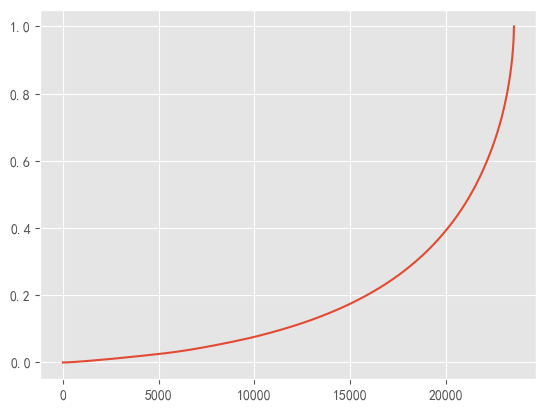

In [11]:
用户与累加["用户贡献值"].plot()


用户消费行为

1.用户首购时间

In [12]:
df["购买日期"] = df['购买日期'].sort_index()
df

,用户ID,购买日期,购买产品数量,购买金额,购买月份
0,1,1997-01-01,1,11.77,1997-01
1,2,1997-01-12,1,12.00,1997-01
2,2,1997-01-12,5,77.00,1997-01
3,3,1997-01-02,2,20.76,1997-01
4,3,1997-03-30,2,20.76,1997-03
...,...,...,...,...,...
69654,23568,1997-04-05,4,83.74,1997-04
69655,23568,1997-04-22,1,14.99,1997-04
69656,23569,1997-03-25,2,25.74,1997-03
69657,23570,1997-03-25,3,51.12,1997-03


<Axes: xlabel='购买日期'>

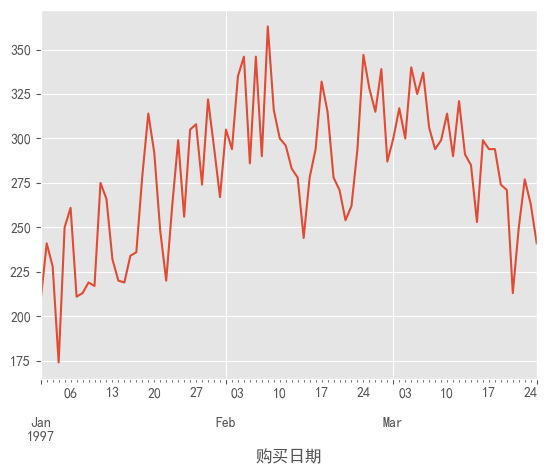

In [13]:
df.groupby("用户ID")["购买日期"].min().value_counts().sort_index().plot()

2.最后购买日期

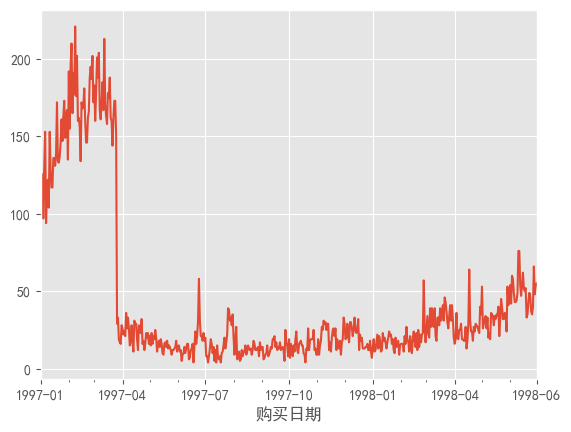

In [14]:
df.groupby("用户ID")["购买日期"].max().value_counts().sort_index().plot()
ax = plt.gca()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.show()

用户分层

In [15]:

rfm = df.pivot_table(index="用户ID",
                    values=["购买产品数量","购买金额","购买日期"],
                     aggfunc={"购买日期":"max",
                              "购买产品数量":"sum",
                              "购买金额":"sum"}
                    )
rfm=rfm[["购买金额","购买日期","购买产品数量"]]
rfm

,购买金额,购买日期,购买产品数量
用户ID,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,6
3,156.46,1998-05-28,16
4,100.50,1997-12-12,7
5,385.61,1998-01-03,29
...,...,...,...
23566,36.00,1997-03-25,2
23567,20.97,1997-03-25,1
23568,121.70,1997-04-22,6


In [16]:
rfm["购买日期"].max()

Timestamp('1998-06-30 00:00:00')

In [17]:

rfm["R"] = -(rfm["购买日期"]-rfm["购买日期"].max())/np.timedelta64(1,"D")
rfm= rfm.rename(columns={"购买产品数量":"F","购买金额":"M"})

rfm

,M,购买日期,F,R
用户ID,,,,
1,11.77,1997-01-01,1,545.0
2,89.00,1997-01-12,6,534.0
3,156.46,1998-05-28,16,33.0
4,100.50,1997-12-12,7,200.0
5,385.61,1998-01-03,29,178.0
...,...,...,...,...
23566,36.00,1997-03-25,2,462.0
23567,20.97,1997-03-25,1,462.0
23568,121.70,1997-04-22,6,434.0


In [18]:

def rfm_func(x):
    level = x.apply(lambda x:"1" if x>=1 else "0")
    label = level["R"]+level["F"]+level["M"]
    d={'111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要发展客户',
        '001':'重要挽留客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般发展客户',
        '000':'一般挽留客户'}
    result = d[label]
    return result
rfm["客户类型"] = rfm[["R","F","M"]].apply(lambda x:x-x.mean()).apply(rfm_func,axis=1)
rfm
    

,M,购买日期,F,R,客户类型
用户ID,,,,,
1,11.77,1997-01-01,1,545.0,一般发展客户
2,89.00,1997-01-12,6,534.0,一般发展客户
3,156.46,1998-05-28,16,33.0,重要保持客户
4,100.50,1997-12-12,7,200.0,一般挽留客户
5,385.61,1998-01-03,29,178.0,重要保持客户
...,...,...,...,...,...
23566,36.00,1997-03-25,2,462.0,一般发展客户
23567,20.97,1997-03-25,1,462.0,一般发展客户
23568,121.70,1997-04-22,6,434.0,重要发展客户


Text(0, 0.5, 'R(最近消费日期)')

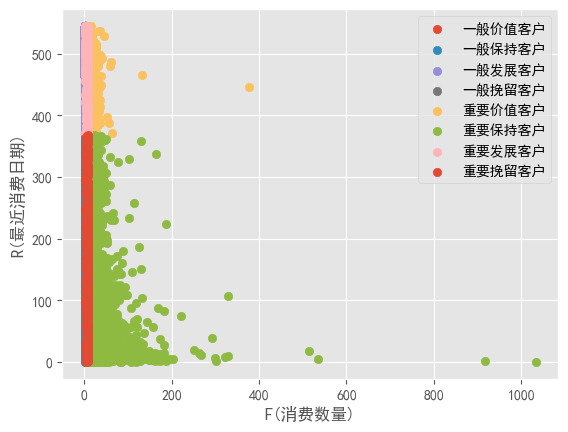

In [19]:
for label,grouped in rfm.groupby("客户类型"):
    x = grouped["F"]
    y = grouped["R"]
    plt.scatter(x,y,label=label)
plt.legend()


plt.xlabel("F(消费数量)")
plt.ylabel("R(最近消费日期)")

新老,活跃,回流用户分析(根据用户与购买时间的关系进行分类)

- 新用户的定义是第一次消费。
- 活跃用户即老客，在某一个时间窗口内有过消费。
- 不活跃用户则是时间窗口内没有消费过的老客。
- 回流用户：相当于回头客的意思。
- 用户回流的动作可以分为自主回流与人工回流，自主回流指玩家自己回流了，而人工回流则是人为参与导致的。

pivot_table与grouody区别:groupdy一个列聚合函数用快,pivot_table多个列的聚合函数

In [20]:
pivoted_counts = df.pivot_table(index="用户ID",
                                  columns="购买月份",
                                  values= "购买日期",
                                  aggfunc="count").fillna(0)
pivoted_counts

购买月份,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
用户ID,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23567,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23568,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:

df_purchase = pivoted_counts.applymap(lambda x:1 if x>0 else 0)
df_purchase




C:\Users\a\AppData\Local\Temp\ipykernel_12456\2539020795.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_purchase = pivoted_counts.applymap(lambda x:1 if x>0 else 0)


购买月份,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
用户ID,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23567,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23568,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:


def active_status(data):
    
    
    status =[]   
    for i in range(18):
        if data[i] == 0: 
            if len(status) == 0:
                status.append("unreg")  
            else :
                if status[i-1] =='unreg':
                    status.append('unreg')
                else:
                    status.append("unactive")   
        else :
            if len(status) == 0:
                status.append("new")
            else:
                if status[i-1] == "unreg":
                    status.append("new")
                elif status[i-1] == "new":
                    status.append("active")    
                elif status[i-1] == "active":
                    status.append("active")     
                elif status[i-1] == "unactive":
                    status.append("return")  
                else:
                    status[i-1] == "return"
                    status.append("active")  
    return pd.Series(status,df_purchase.columns)
                
        
用户分层 = df_purchase.apply(active_status,axis=1) 
用户分层

C:\Users\a\AppData\Local\Temp\ipykernel_12456\1708814227.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data[i] == 0: #今月没有消费


购买月份,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
用户ID,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23567,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23568,unreg,unreg,new,active,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive


In [23]:

用户分层2  = 用户分层.replace("unreg",np.nan)  
用户分层2 =用户分层2.apply(lambda x:x.value_counts()).fillna(0)
用户分层2.head()


购买月份,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
active,0.0,1157.0,1681,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624.0,632.0,512.0,472.0,571.0,518.0,459.0,446.0
new,7846.0,8476.0,7248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
return,0.0,0.0,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1404.0,1232.0,1025.0,1079.0,1489.0,919.0,1029.0,1060.0
unactive,0.0,6689.0,14046,20748.0,21356.0,21231.0,21390.0,21798.0,21831.0,21731.0,21542.0,21706.0,22033.0,22019.0,21510.0,22133.0,22082.0,22064.0


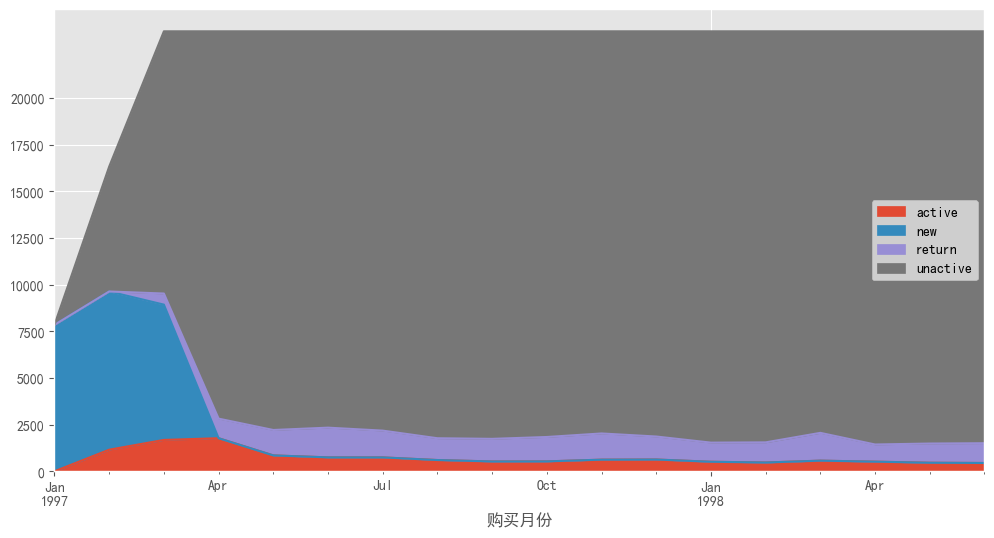

In [24]:

用户分层2.T.plot.area(figsize=(12,6))
plt.yticks(np.arange(0, 22500, 2500))

plt.show()




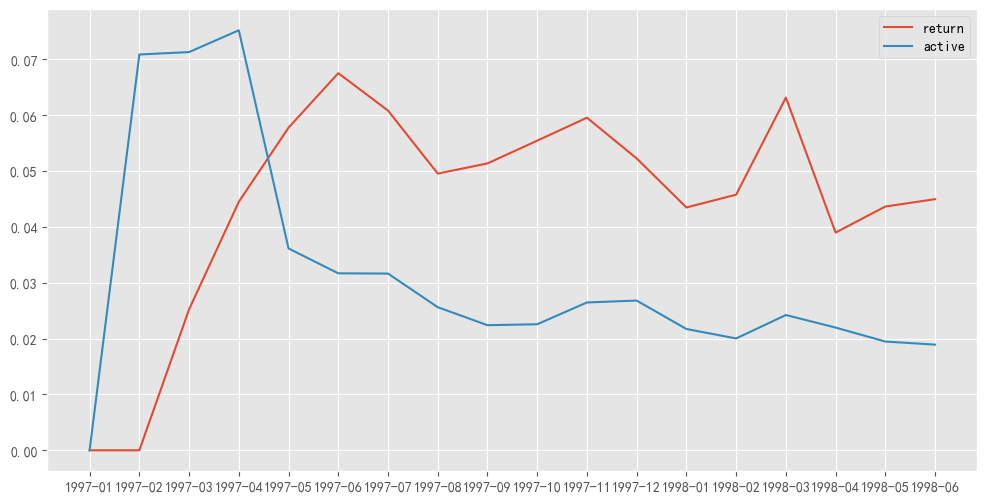

In [25]:

plt.figure(figsize=(12,6))
回流用户占比 = 用户分层2.T.apply(lambda x:x/x.sum(),axis=1)
回流用户占比.index = 回流用户占比.index.astype(str)
plt.plot(回流用户占比['return'],label='return')



plt.plot(回流用户占比['active'],label='active')
plt.legend()



用户周期

In [26]:

data1 = pd.DataFrame({
    'a':[0,1,2,3,4,5],
    'b':[5,4,3,2,1,0]
})
data1.shift(axis=0) 


,a,b
0,NaN,NaN
1,0.0,5.0
2,1.0,4.0
3,2.0,3.0
4,3.0,2.0
5,4.0,1.0


In [27]:
data1.shift(axis=1)

,a,b
0,NaN,0
1,NaN,1
2,NaN,2
3,NaN,3
4,NaN,4
5,NaN,5


In [28]:

购买周期 =df.groupby("用户ID")["购买日期"].apply(lambda x:x-x.shift())






购买周期


用户ID        
1      0           NaT
2      1           NaT
       2        0 days
3      3           NaT
       4       87 days
                 ...  
23568  69654   11 days
       69655   17 days
23569  69656       NaT
23570  69657       NaT
       69658    1 days
Name: 购买日期, Length: 69659, dtype: timedelta64[ns]

In [29]:
购买周期.describe()

count                         46089
mean     68 days 23:22:13.567662566
std      91 days 00:47:33.924168893
min                 0 days 00:00:00
25%                10 days 00:00:00
50%                31 days 00:00:00
75%                89 days 00:00:00
max               533 days 00:00:00
Name: 购买日期, dtype: object

<Axes: >

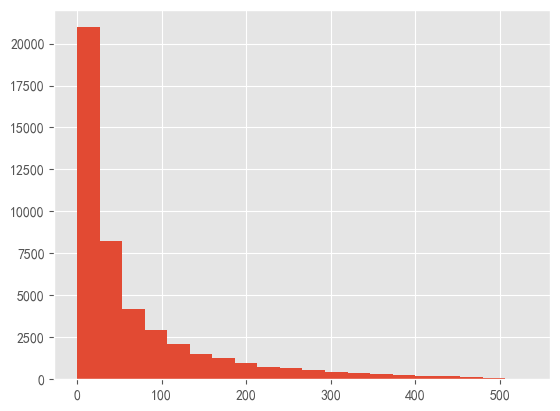

In [30]:
(购买周期/np.timedelta64(1,"D")).hist(bins = 20)








用户生命周期

In [31]:

用户生命周期 = df.groupby("用户ID")["购买日期"].agg(["min","max"])
用户生命周期

,min,max
用户ID,,
1,1997-01-01,1997-01-01
2,1997-01-12,1997-01-12
3,1997-01-02,1998-05-28
4,1997-01-01,1997-12-12
5,1997-01-01,1998-01-03
...,...,...
23566,1997-03-25,1997-03-25
23567,1997-03-25,1997-03-25
23568,1997-03-25,1997-04-22


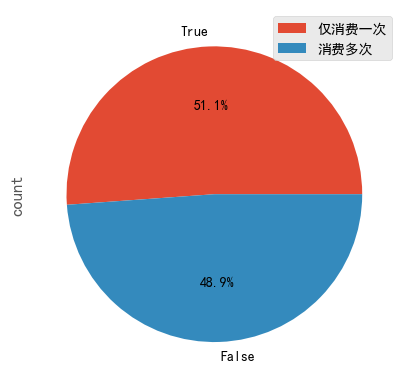

In [32]:
(用户生命周期["max"]==用户生命周期["min"]).value_counts().plot.pie(autopct = "%1.1f%%")

plt.legend(["仅消费一次","消费多次"])


In [33]:
(用户生命周期["max"]-用户生命周期["min"]).describe()


count                          23570
mean     134 days 20:55:36.987696224
std      180 days 13:46:43.039788104
min                  0 days 00:00:00
25%                  0 days 00:00:00
50%                  0 days 00:00:00
75%                294 days 00:00:00
max                544 days 00:00:00
dtype: object

所有的用户生命周期直方图+多次消费的用户生命周期直方图

Text(0, 0.5, '用户人数')

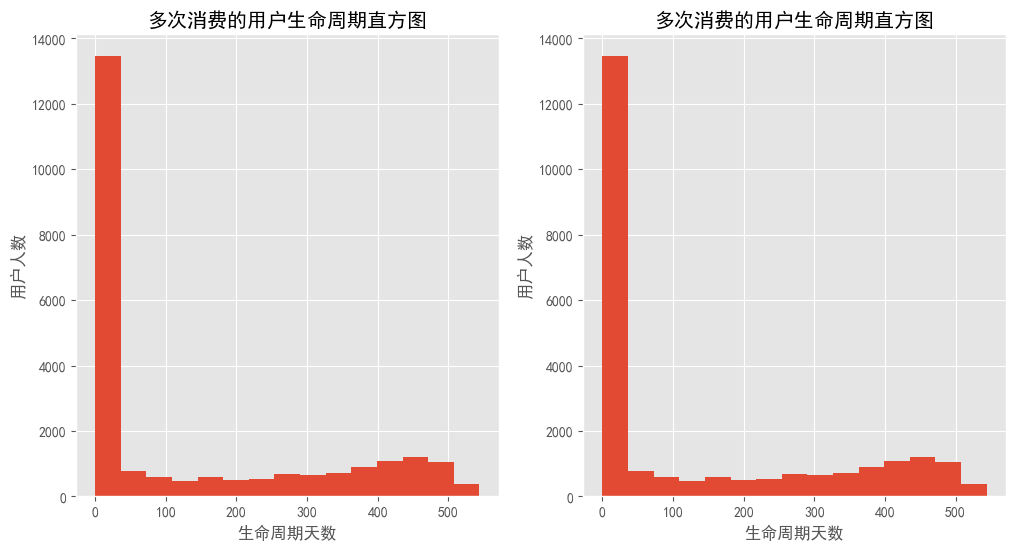

In [41]:
plt.figure(figsize=(12,6))
plt.subplot(121)
((用户生命周期["max"]-用户生命周期["min"])/np.timedelta64(1,"D")).hist(bins=15)
plt.title('多次消费的用户生命周期直方图')
plt.xlabel('生命周期天数')
plt.ylabel('用户人数')


plt.subplot(122)

多次消费的用户生命周期=(用户生命周期["max"]-用户生命周期["min"]).reset_index()[0]/np.timedelta64(1,"D")

多次消费的用户生命周期[多次消费的用户生命周期>0]

多次消费的用户生命周期.hist(bins=15)
plt.title('多次消费的用户生命周期直方图')
plt.xlabel('生命周期天数')
plt.ylabel('用户人数')

In [39]:
(用户生命周期["max"]-用户生命周期["min"]).reset_index()

,用户ID,0
0,1,0 days
1,2,0 days
2,3,511 days
3,4,345 days
4,5,367 days
...,...,...
23565,23566,0 days
23566,23567,0 days
23567,23568,28 days
23568,23569,0 days


复购率

<Axes: xlabel='购买月份'>

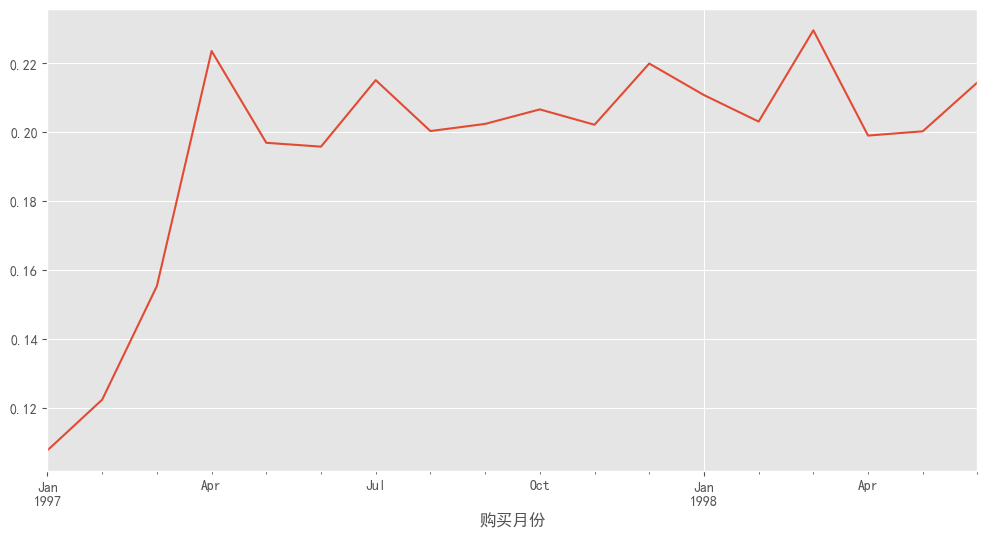

In [36]:



复购数据 = pivoted_counts.map(lambda x: 1  if x>1 else (np.nan if x==0 else 0))

(复购数据.sum()/复购数据.count()).plot(figsize=(12,6))





回购率

In [37]:

def 回购数据函数(data):
    status=[] 
    
    for i in range(17):  
                            
                        
        if data[i] == 1: 
            if data[i+1] == 1:
                status.append(1)  
                                    
            else:
                status.append(0)

        else: 
            status.append(np.nan)
    status.append(np.NaN) 
    return pd.Series(status,df_purchase.columns)
回购数据 = df_purchase.apply(回购数据函数,axis =1)
回购数据

C:\Users\a\AppData\Local\Temp\ipykernel_12456\1329621807.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data[i] == 1: #注意第一行i是多少,就说明status=[]记忆第几个,最多17个,跟后"i+1"没关系
C:\Users\a\AppData\Local\Temp\ipykernel_12456\1329621807.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data[i+1] == 1:


购买月份,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
用户ID,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23567,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23568,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


回购与复购可视化分析

Text(0.5, 1.0, '回购人数和购物人数对比图')

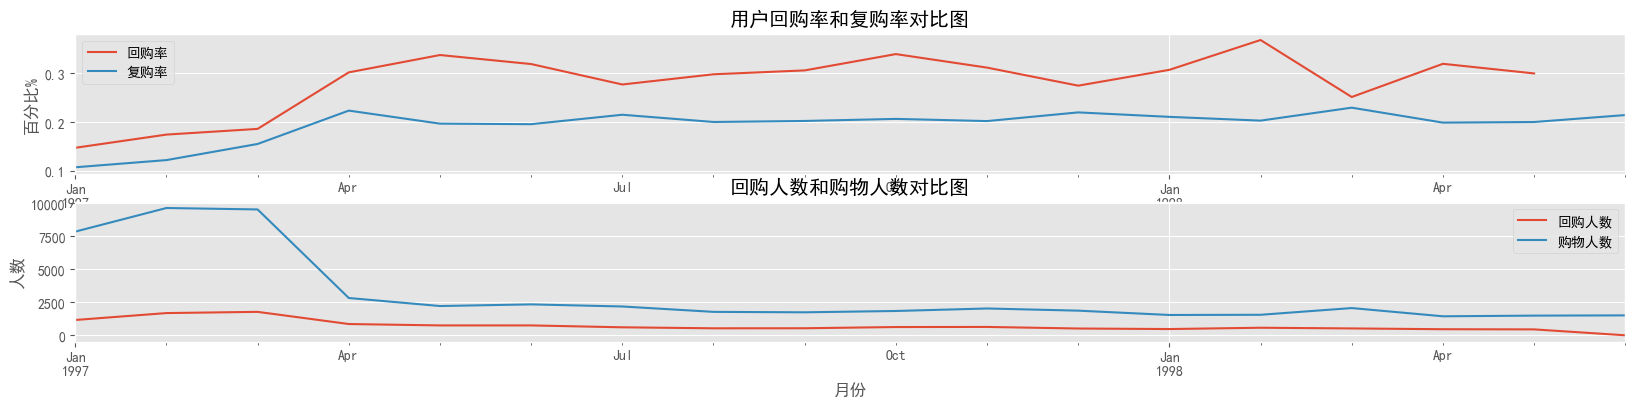

In [38]:
plt.figure(figsize=(20,4))
plt.subplot(211)
(回购数据.sum()/回购数据.count()).plot(label="回购率")
(复购数据.sum()/复购数据.count()).plot(label="复购率")
plt.legend()
plt.ylabel('百分比%')
plt.title('用户回购率和复购率对比图')



plt.subplot(212)
回购数据.sum().plot(label="回购人数")
复购数据.count().plot(label="购物人数")
plt.legend()
plt.ylabel('人数')
plt.xlabel('月份')
plt.title('回购人数和购物人数对比图')

In [1]:
import os
os.startfile(os.getcwd())